**Customer Churn Analysis EDA**

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Loading Data**

In [181]:
df = pd.read_csv("C:/Users/anjal/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [182]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [183]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())


Dataset Shape: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract  

**Data Cleaning**

In [184]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())




In [185]:
print(df['Churn'].head())

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object


In [187]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 5)


**EDA**

*Target Variable Distribution*


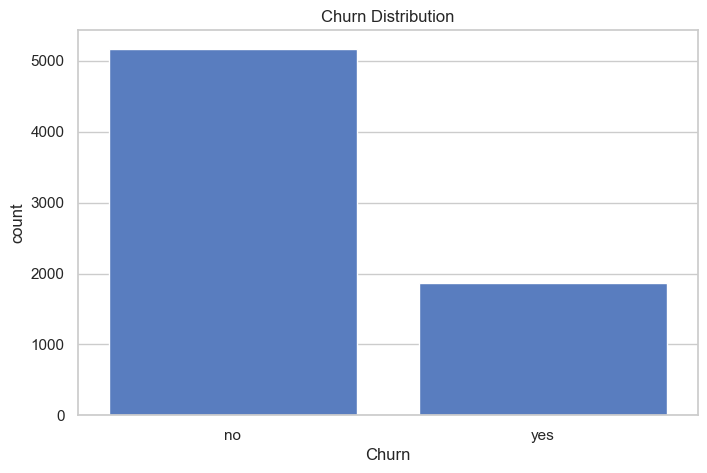

In [188]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()
          


In [200]:
# Percentage distribution

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate (%):\n", churn_rate)


Churn Rate (%):
 Churn
no     73.463013
yes    26.536987
Name: proportion, dtype: float64


**Categorical Features Vs CHurn**

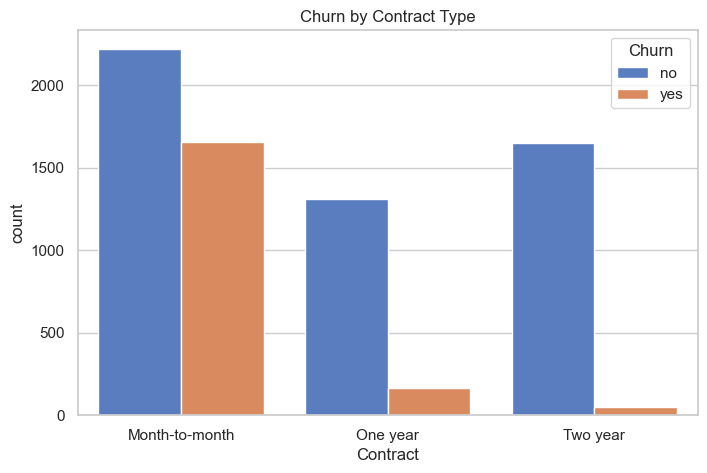

In [190]:
# Contract type vs churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()




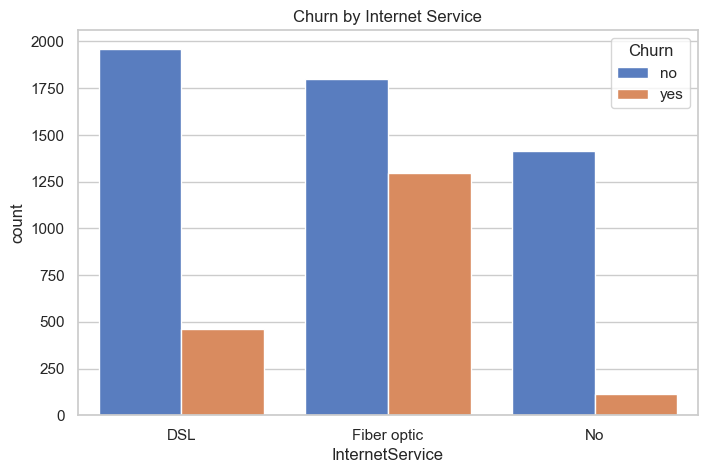

In [191]:
# Internet service vs churn
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()



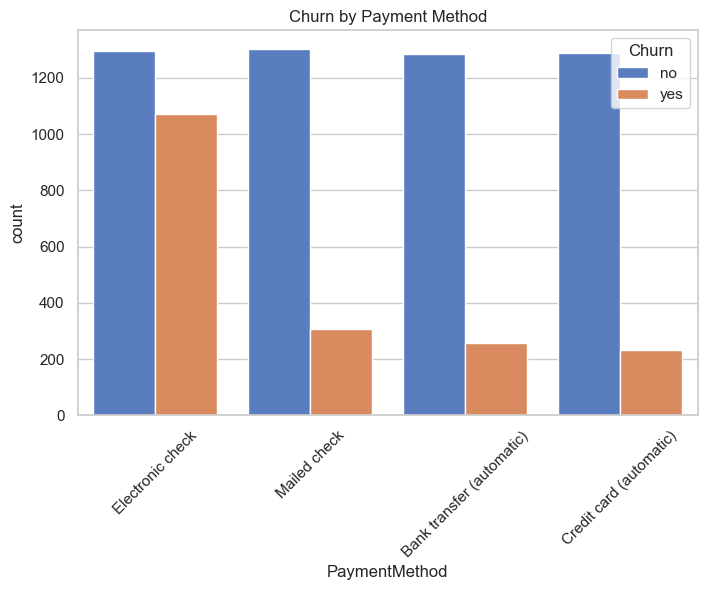

In [192]:

# Payment method vs churn
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

**Correlation Analytics**

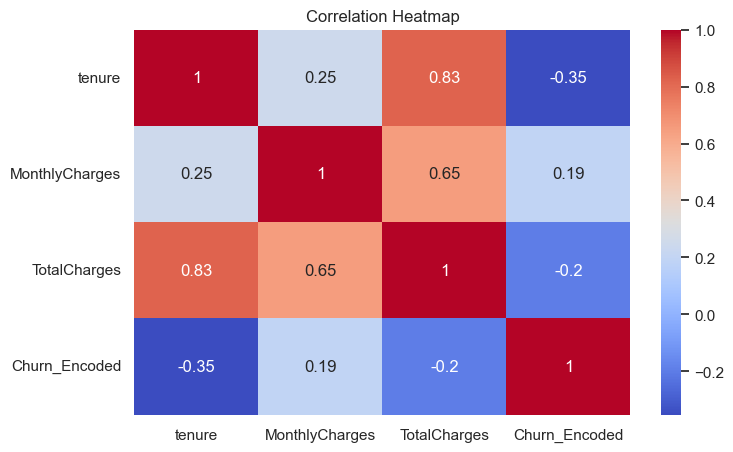

In [202]:
# Encode churn for correlation
df['Churn_Encoded'] = df['Churn'].map({'yes': 1, 'no': 0})

corr = df[['tenure','MonthlyCharges','TotalCharges','Churn_Encoded']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [194]:
print(df['Churn'].unique())
print(df['Churn'].dtype)

['no' 'yes']
object


**Insights Summary**

In [198]:
# Encode churn column correctly
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
df['Churn_Encoded'] = df['Churn'].map({'yes': 1, 'no': 0})

# Calculate overall churn and retention rates as floats
churn_rate = df['Churn_Encoded'].mean() * 100
retention_rate = 100 - churn_rate

In [199]:
print("\n--- Key Insights ---")
print(f"1. Overall churn rate is around {churn_rate:.2f}%")
print(f"   Retention rate is around {retention_rate:.2f}%")
print("2. Customers with month-to-month contracts churn more often.")
print("3. Higher monthly charges are associated with higher churn.")
print("4. Longer tenure customers are less likely to churn.")
print("5. Payment method (electronic check) shows higher churn tendency.")
print("6. Customers with fiber optic internet are more likely to churn.")



--- Key Insights ---
1. Overall churn rate is around 26.54%
   Retention rate is around 73.46%
2. Customers with month-to-month contracts churn more often.
3. Higher monthly charges are associated with higher churn.
4. Longer tenure customers are less likely to churn.
5. Payment method (electronic check) shows higher churn tendency.
6. Customers with fiber optic internet are more likely to churn.
